In [5]:
import math

import matplotlib.pyplot as plt
import numpy as np
import torch

from finetune_rl import mouth_dataset, eyes_dataset , get_reward


/opt/homebrew/anaconda3/envs/cs285/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Progress: 0.0%
Progress: 5.0%
Progress: 10.0%
Progress: 15.0%
Progress: 20.0%
Progress: 25.0%
Progress: 30.0%
Progress: 35.0%
Progress: 40.0%
Progress: 45.0%
Progress: 50.0%
Progress: 55.0%
Progress: 60.0%
Progress: 65.0%
Progress: 70.0%
Progress: 75.0%
Progress: 80.0%
Progress: 85.0%
Progress: 90.0%
Progress: 95.0%


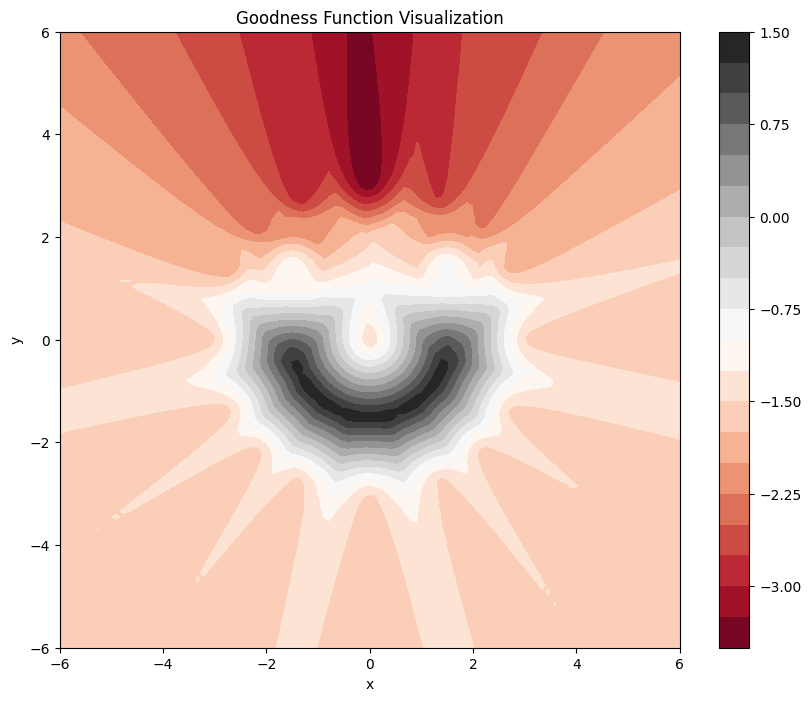

In [7]:
# Create a grid of x and y values
x = np.linspace(-6, 6, 100)
y = np.linspace(-6, 6, 100)
X, Y = np.meshgrid(x, y)

# Initialize an array for storing results
Z = np.zeros_like(X)

# Compute goodness for each point in the grid
for i, yi in enumerate(y):
    for j, xi in enumerate(x):
        Z[i, j] = get_reward(xi, yi)
    # Print progress every 10 steps
    if i % 5 == 0:
        print(f"Progress: {i/len(y)*100:.1f}%")

# Create a contour plot
plt.figure(figsize=(10, 8))
plt.contourf(X, Y, Z, 20, cmap='RdGy')
plt.colorbar()
plt.title('Goodness Function Visualization')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [9]:
mouth_dataset()

array([[ 2.9630098 , -0.05890843],
       [-0.03220458,  3.036226  ],
       [ 2.6857004 , -1.3249294 ],
       ...,
       [-0.170813  , -1.4902426 ],
       [-0.8733669 , -1.2195206 ],
       [-0.04362394, -1.4993656 ]], dtype=float32)

In [1]:
import json

# Function to load JSON data from a file
def load_json(filename):
    with open(filename, 'r') as file:
        data = json.load(file)
    return data

# Load the data from 'trajs.json'
traj_data = load_json('trajs.json')

In [8]:
trajectory_length = len(traj_data[0]["observation"])
trajectory_count = len(traj_data)

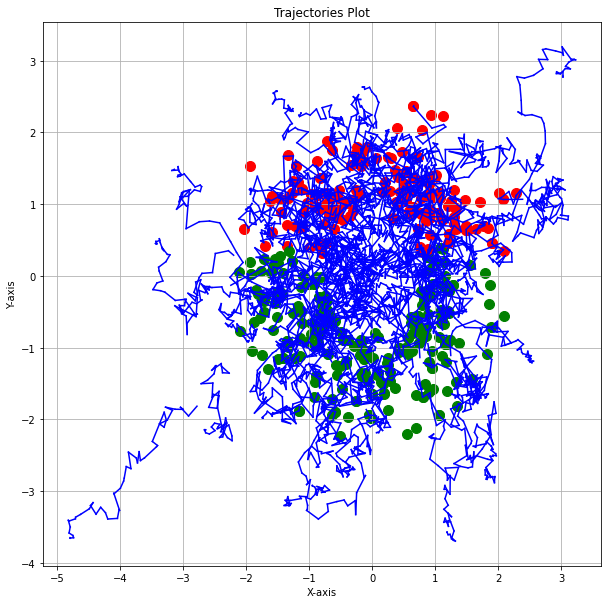

In [26]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))  # Set the size of the plot

for traj_idx in range(trajectory_count):
    if traj_idx > 100:
        continue
    for timestep in range(trajectory_length):
        obs = traj_data[traj_idx]["observation"][timestep]
        next_obs = traj_data[traj_idx]["next_obersation"][timestep]
        action = traj_data[traj_idx]["action"][timestep]
        reward = traj_data[traj_idx]["reward"][timestep]

        # Plot a line segment between obs and next_obs
        plt.plot([obs[0], next_obs[0]], [obs[1], next_obs[1]], color='blue')
        
        if reward != 0:
            color = 'green' if reward > 0 else 'red'
            plt.scatter(*next_obs, color=color, s=100)  # s is the size of the marker

for traj_idx in range(trajectory_count):
    if traj_idx > 500:
        continue
    for timestep in range(trajectory_length):
        obs = traj_data[traj_idx]["observation"][timestep]
        next_obs = traj_data[traj_idx]["next_obersation"][timestep]
        action = traj_data[traj_idx]["action"][timestep]
        reward = traj_data[traj_idx]["reward"][timestep]

        # Plot a line segment between obs and next_obs
        
        if reward != 0:
            color = 'green' if reward > 0 else 'red'
            plt.scatter(*next_obs, color=color, s=100)  # s is the size of the marker

plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Trajectories Plot')
plt.grid(True)
plt.show()